In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
df = pd.read_csv("mental_health.csv")

This time we perform group based analysis on gender , there are three types of values in gender sections which are :
1. Male
2. Female
3. Others

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [9]:
num_cols = ["Daily_Screen_Time(hrs)" , "Sleep_Quality(1-10)" , "Stress_Level(1-10)" , "Days_Without_Social_Media" , "Exercise_Frequency(week)" , "Happiness_Index(1-10)"]

In [3]:
df["Gender"].value_counts()

Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64

Male and Females have proper representation in the dataset , while on the other hand , the other group is very less compared to the both counterparts
Any observations relating to the other group will not be concluded directly due to undersampling of that category

<Axes: xlabel='Gender', ylabel='count'>

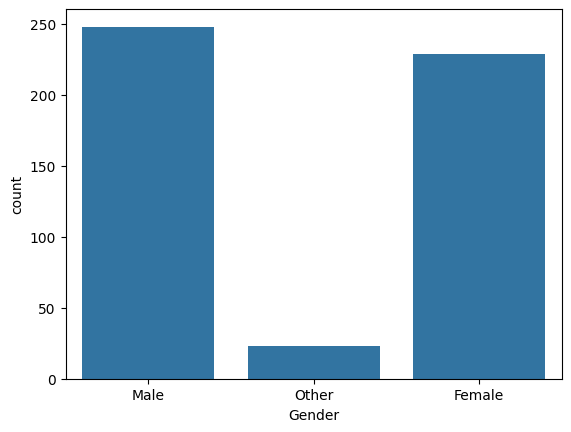

In [4]:
sns.countplot(x = df["Gender"])

STEP 1 : is to analyse the genders by their values in the numeric features 
In total , there are 6 main numeric coloumns that are continous or ordinal random variables 

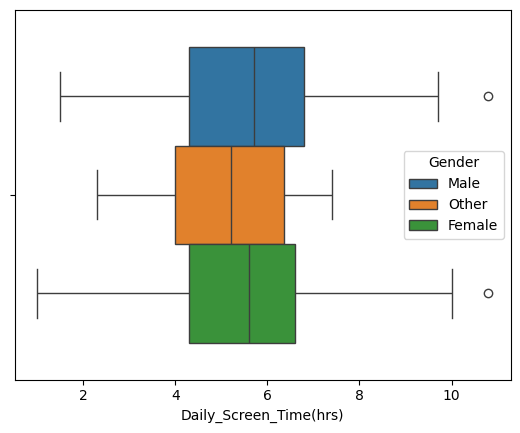

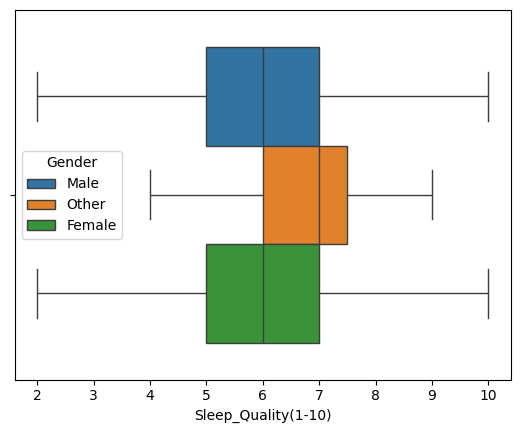

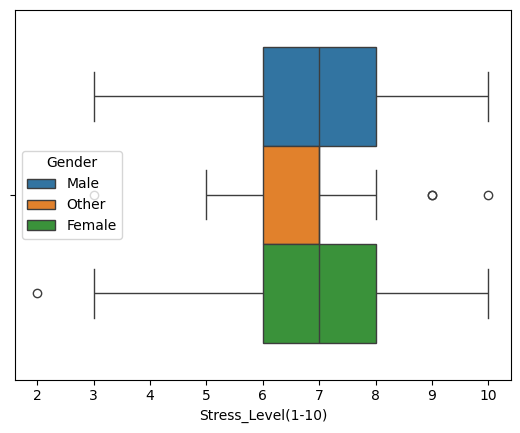

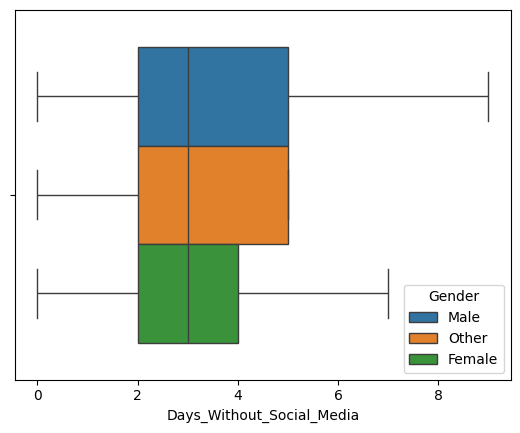

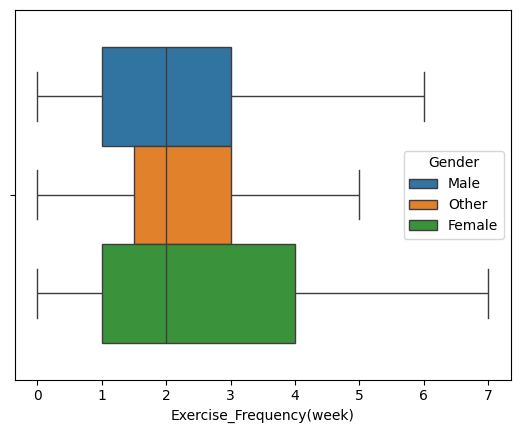

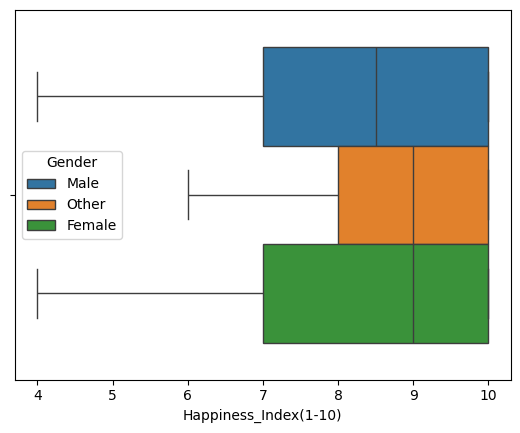

In [ ]:
for col1 , col2 in combinations(num_cols , 2):
    sns.boxplot(data=df , x=col1 , y=col2 , hue="Gender")
    plt.show()

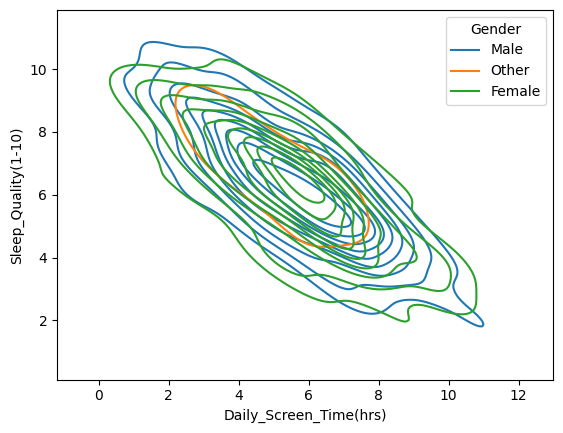

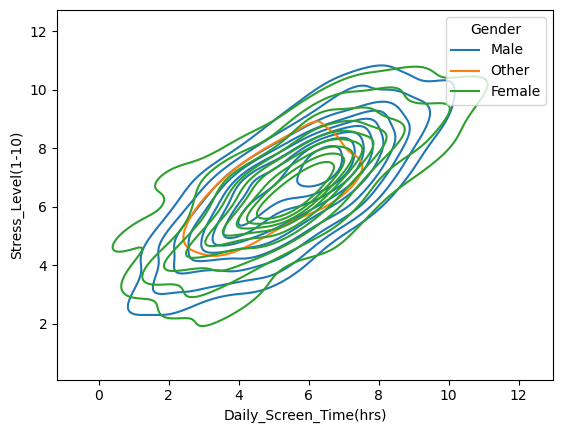

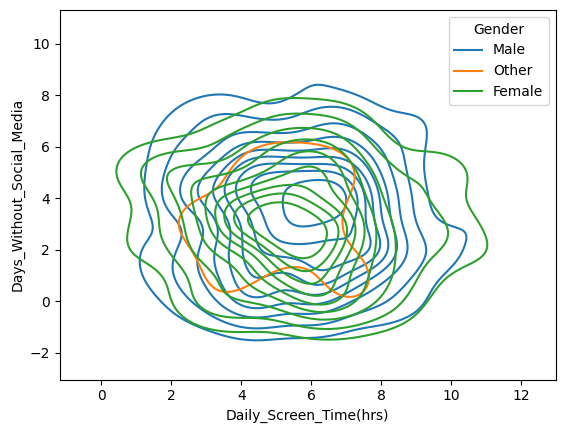

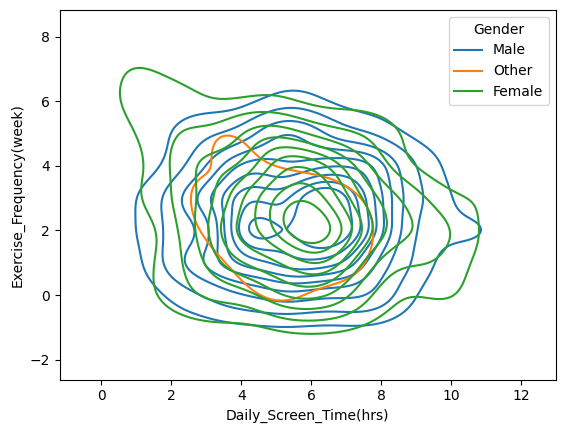

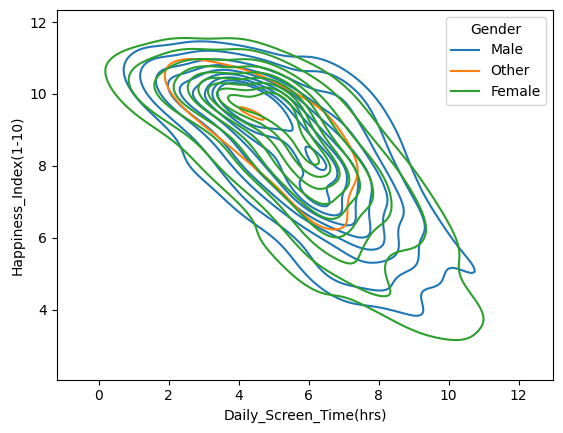

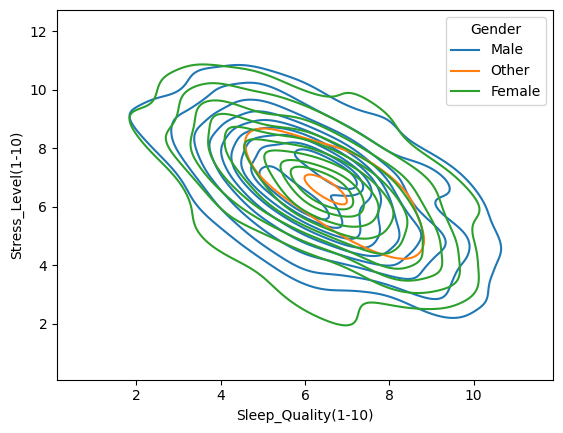

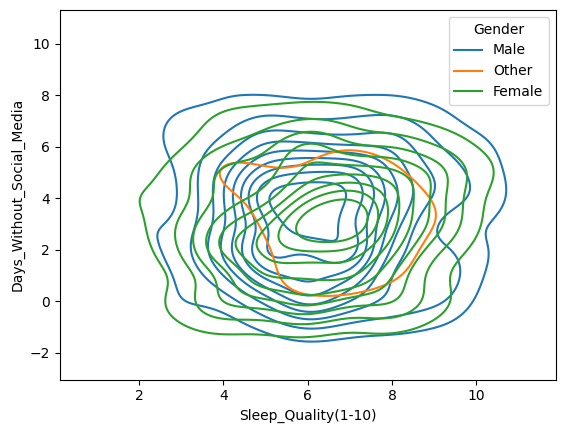

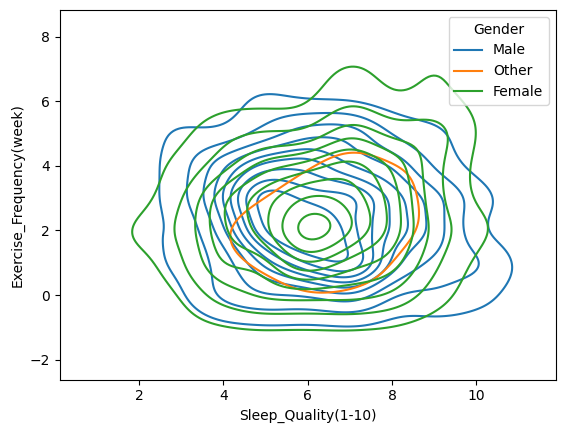

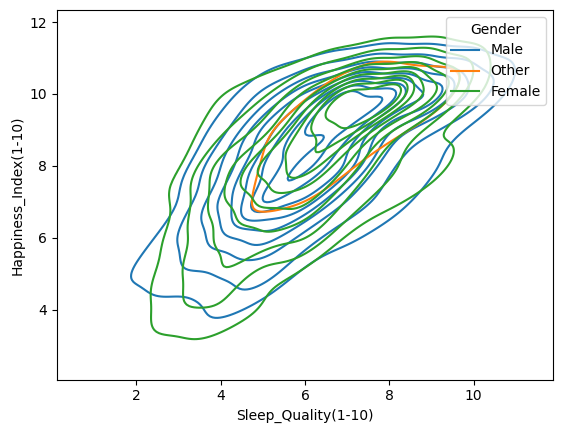

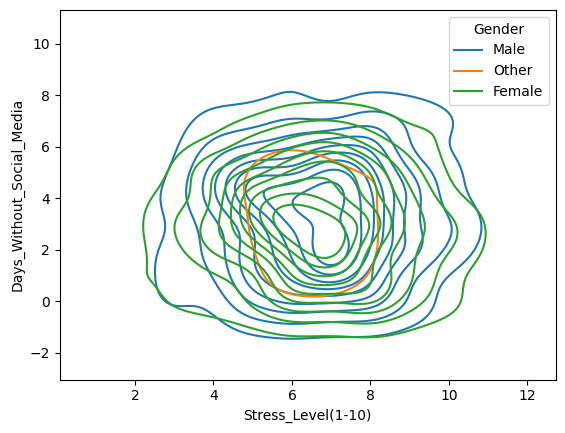

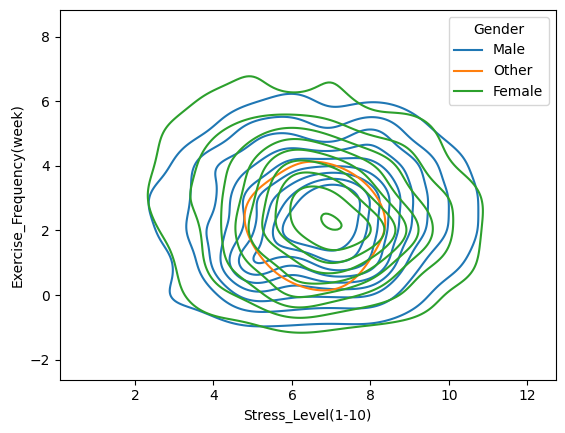

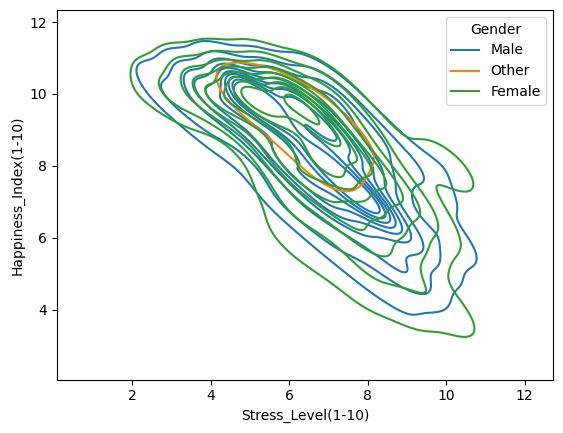

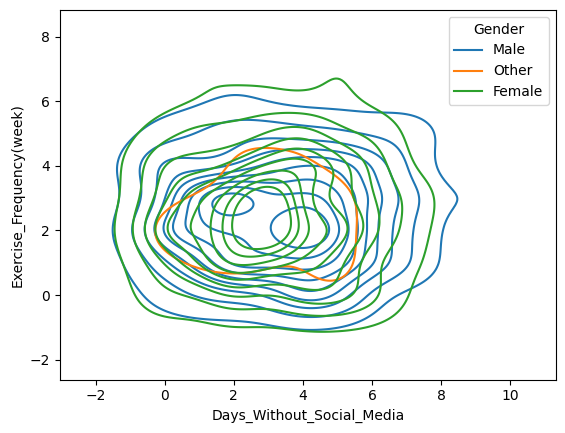

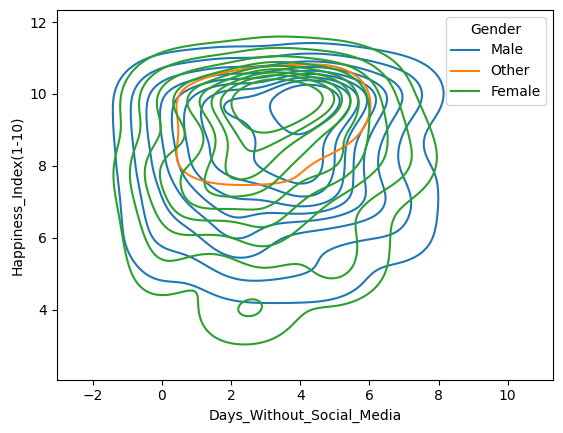

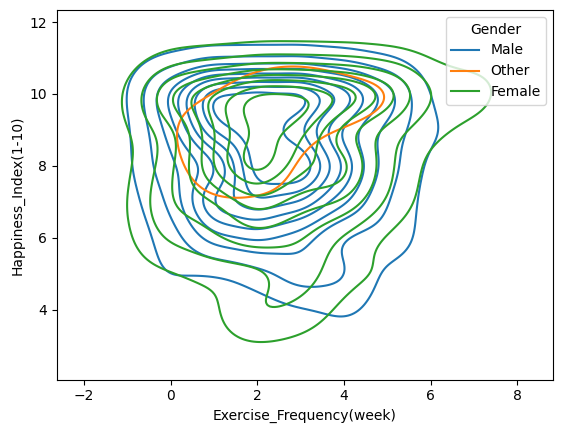

In [17]:
for col1 , col2 in combinations(num_cols , 2):
    sns.kdeplot(data=df , x=col1 , y=col2 , hue="Gender")
    plt.show()

The KDE plots explore the distribution of data points across the comparison of all values,hued by gender.
It shows the density of datapoints across the distribution
These are the following observations made from each kde-plot:
1.  Among Exercise frequency and daily screen time there seems to be almost no relation , but we can see outliers in both genders , in females daily screen time is less with high ex. frequency , while in males , some outliers have high screen time and low ex. frequency

In [18]:
df.groupby("Gender")[num_cols].corr()

Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
Gender                                                                          
Female Daily_Screen_Time(hrs)                   1.000000            -0.750119   
       Sleep_Quality(1-10)                     -0.750119             1.000000   
       Stress_Level(1-10)                       0.740180            -0.574846   
       Days_Without_Social_Media               -0.095164             0.113617   
       Exercise_Frequency(week)                -0.189461             0.145418   
       Happiness_Index(1-10)                   -0.713693             0.691819   
Male   Daily_Screen_Time(hrs)                   1.000000            -0.777188   
       Sleep_Quality(1-10)                     -0.777188             1.000000   
       Stress_Level(1-10)                       0.742701            -0.587098   
       Days_Without_Social_Media               -0.009423            -0.005148   
       Exercise_Frequency(week)                 0.015120            -0.105868   
       Happiness_Index(1-10)                   -0.695491             0.665414   
Other  Daily_Screen_Time(hrs)                   1.000000            -0.632773   
       Sleep_Quality(1-10)                     -0.632773             1.000000   
       Stress_Level(1-10)                       0.741847            -0.692275   
       Days_Without_Social_Media                0.012524            -0.181911   
       Exercise_Frequency(week)                -0.274778             0.136573   
       Happiness_Index(1-10)                   -0.685140             0.667944   

                                  Stress_Level(1-10)  \
Gender                                                 
Female Daily_Screen_Time(hrs)               0.740180   
       Sleep_Quality(1-10)                 -0.574846   
       Stress_Level(1-10)                   1.000000   
       Days_Without_Social_Media           -0.043451   
       Exercise_Frequency(week)            -0.094382   
       Happiness_Index(1-10)               -0.729034   
Male   Daily_Screen_Time(hrs)               0.742701   
       Sleep_Quality(1-10)                 -0.587098   
       Stress_Level(1-10)                   1.000000   
       Days_Without_Social_Media            0.014640   
       Exercise_Frequency(week)             0.074987   
       Happiness_Index(1-10)               -0.754072   
Other  Daily_Screen_Time(hrs)               0.741847   
       Sleep_Quality(1-10)                 -0.692275   
       Stress_Level(1-10)                   1.000000   
       Days_Without_Social_Media            0.087110   
       Exercise_Frequency(week)            -0.143089   
       Happiness_Index(1-10)               -0.678087   

                                  Days_Without_Social_Media  \
Gender                                                        
Female Daily_Screen_Time(hrs)                     -0.095164   
       Sleep_Quality(1-10)                         0.113617   
       Stress_Level(1-10)                         -0.043451   
       Days_Without_Social_Media                   1.000000   
       Exercise_Frequency(week)                    0.001631   
       Happiness_Index(1-10)                       0.107100   
Male   Daily_Screen_Time(hrs)                     -0.009423   
       Sleep_Quality(1-10)                        -0.005148   
       Stress_Level(1-10)                          0.014640   
       Days_Without_Social_Media                   1.000000   
       Exercise_Frequency(week)                   -0.000443   
       Happiness_Index(1-10)                       0.029663   
Other  Daily_Screen_Time(hrs)                      0.012524   
       Sleep_Quality(1-10)                        -0.181911   
       Stress_Level(1-10)                          0.087110   
       Days_Without_Social_Media                   1.000000   
       Exercise_Frequency(week)                    0.036216   
       Happiness_Index(1-10)                       0.020301   

                               

# Correlation Analysis: Digital Habits, Lifestyle & Wellbeing  
**By Gender** (Pearson correlation matrices)

---

## Key Takeaways (All Genders)

| Factor | Strongest Negative Impact on Happiness | Strongest Positive Impact on Happiness |
|--------|----------------------------------------|---------------------------------------|
| **Screen Time** | **-0.70** (Females), **-0.70** (Males), **-0.69** (Other) | — |
| **Stress**      | **-0.73** (Females), **-0.75** (Males), **-0.68** (Other) | — |
| **Sleep**       | — | **+0.69** (Females), **+0.67** (Males), **+0.67** (Other) |

- **More screen time → poorer sleep → higher stress → lower happiness**  
  (chain visible in every gender)
- **Social-media detox** and **exercise** have **near-zero** correlation with happiness in most groups.

---

## Detailed Heat-Map Summary

| Correlation | Female | Male | Other |
|-------------|--------|------|-------|
| Screen ↔ Happiness | **-0.71** | **-0.70** | **-0.69** |
| Sleep ↔ Happiness  | **+0.69** | **+0.67** | **+0.67** |
| Stress ↔ Happiness | **-0.73** | **-0.75** | **-0.68** |
| Screen ↔ Sleep     | **-0.75** | **-0.78** | **-0.63** |
| Screen ↔ Stress    | **+0.74** | **+0.74** | **+0.74** |
| Detox ↔ Happiness  | +0.11     | +0.03   | +0.02 |
| Exercise ↔ Happiness | +0.12   | -0.04   | +0.03 |

---

## Gender-Specific Nuggets

### Females
- Strongest screen-sleep link (**-0.75**)
- Exercise shows tiny positive link to happiness (+0.12)

### Males
- Highest stress-happiness penalty (**-0.75**)
- Exercise actually **slightly negative** (-0.04)
- Detox days irrelevant

### Other
- Sleep-stress link strongest (**-0.69**)
- More screen time → less exercise (**-0.27**)

---

## Actionable Insights

1. **Cap daily screen time** under 3 hrs → expect ~0.7-point happiness gain (on 1-10 scale).  
2. **Protect sleep** (7-9 hrs) → single biggest happiness lever across all genders.  
3. **Stress management** beats detox or gym for mood.  
4. Social-media breaks and workouts are **neutral** for happiness in this dataset.

---

*Data source: Correlation matrices stratified by gender (n ≈ hundreds, exact n not provided). Values ≥ |0.60| are considered strong.*

<Axes: ylabel='Gender-None'>

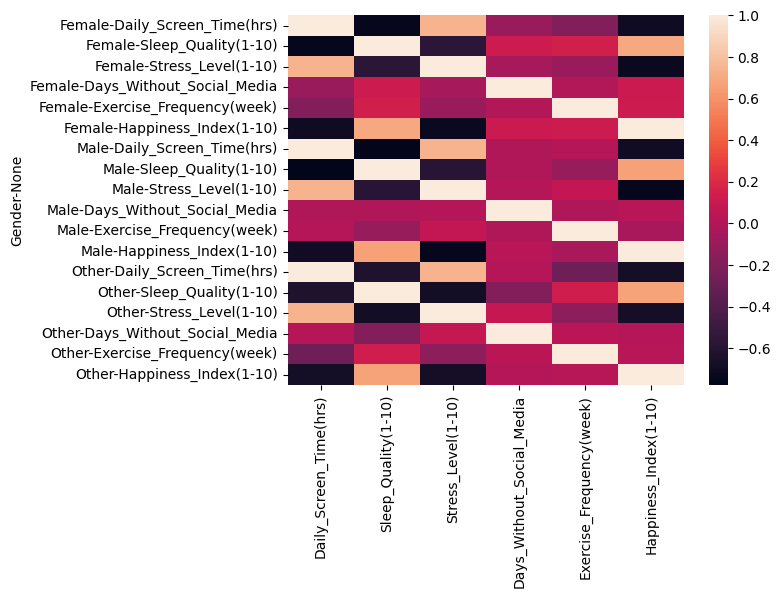

In [19]:
sns.heatmap(df.groupby("Gender")[num_cols].corr())